# Exploratory data analysis FitBit Zip


### Introduction

This notebook contains an exploratory data analysis of a dataset containing the Fitbit Zip (a clip-on activity tracker) data of over 900 volunteers in France (Hermsen, S., Moons, J., Kerkhof, P., Wiekens, C., & De Groot, M. (2017)).


In [1]:
import seaborn as sns  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

df1 = pd.read_csv("steps.csv",  delimiter=";")
df2 = pd.read_csv("survey.csv")

df = pd.merge(df1, df2, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Merging the data

After merging the two datasets containing the Fitbit data, the mean amount of steps per day/participant is calculated and added to the data set. The data will also be subsetted in a new data frame for further analysis and graphed in a boxplot to see if there are any errors or outliers in the data. 



In [2]:
df["mean_steps"] = (df.loc[:, "20-6-2013":"13-5-2014"].mean(axis=1).round(0))
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10206.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8302.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.0


### Outliers and/or errors? 

When analyzing the boxplots to determine large outliers or potential errors, it seems that there are some unlikely variables in the weight and mean steps data. There is a participant that seems to weight 700 kilos, making this person unable to walk. Also, there is a participant that walked over 200.000 steps on average a day, which is around 152,4 KM a day.

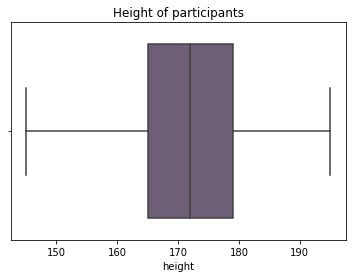

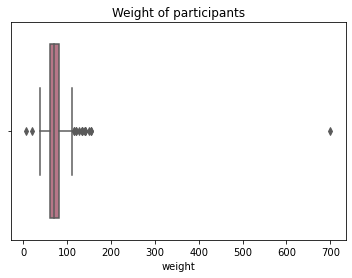

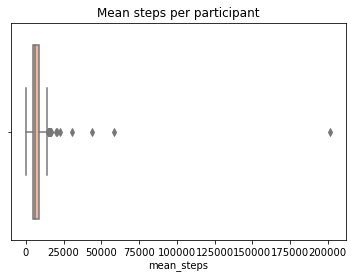

In [3]:
df_subset = df[["height","weight","mean_steps"]]

sns.boxplot(x=df_subset["height"], color="#6C5B7B")
plt.title("Height of participants")
plt.show()

sns.boxplot(x=df_subset["weight"], color="#C06C84")
plt.title("Weight of participants")
plt.show()

sns.boxplot(x=df_subset["mean_steps"], color="#F8B195")
plt.title("Mean steps per participant")
plt.show()

### Cleaning and plotting the data

After determining the outliers, the data will be cleaned and plotted again to determine the distribution of the data.

The distribution of the height per participants is slightly skewed to the left, with the median in the middle. This is common for a normal distribution of data. 
The median is positioned near the middle of the box. The whiskers are about the same length on both sides of the box. The distribution is, therefore, symmetric. There does seem to be two peaks in the data; this could be caused by the two different groups of participants, men and women.

The distribution of weight is strongly skewed to the right. The weight is median regarding the weight is in the middle. Regarding the weight, it can be concluded that 75% of the participants weight less than 80 kilos.

In regards to the mean steps per participants, the data distribution would have been quite normal if it were not for the tail on the right, making the data skewed to the left. The median amount of steps is around 6000 steps.


In [4]:
df_subset = df[(df["height"].between(40, 200)) & (df["weight"].between(50, 200)) & (df["mean_steps"] < 30000)]
df_subset.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10206.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8302.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.0


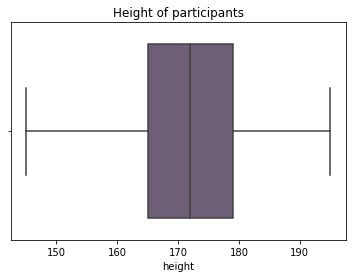

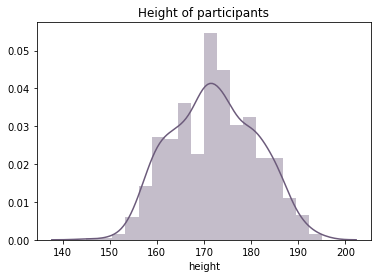

In [5]:
sns.boxplot(x=df_subset["height"], color="#6C5B7B")
plt.title("Height of participants")
plt.show()

sns.distplot(df_subset["height"], color="#6C5B7B")
plt.title("Height of participants")
plt.show()

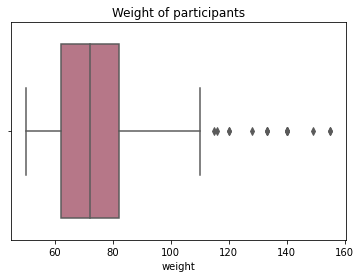

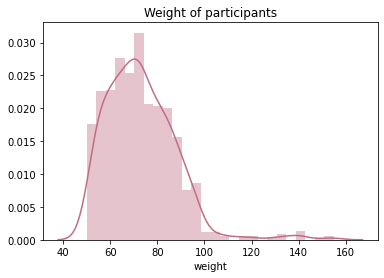

In [6]:
sns.boxplot(x=df_subset["weight"], color="#C06C84")
plt.title("Weight of participants") 
plt.show()

sns.distplot(df_subset["weight"], color="#C06C84")
plt.title("Weight of participants")
plt.show()

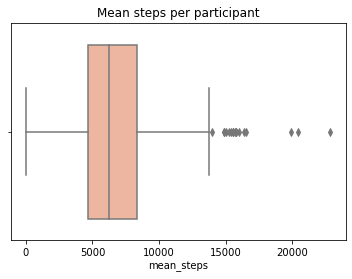

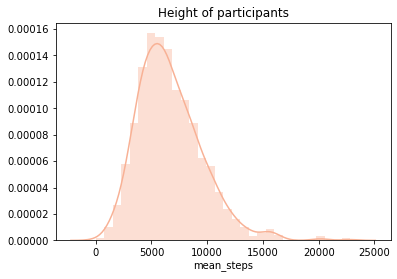

In [7]:
sns.boxplot(x=df_subset["mean_steps"], color="#F8B195")
plt.title("Mean steps per participant")
plt.show()

sns.distplot(df_subset["mean_steps"], color="#F8B195")
plt.title("Height of participants")
plt.show()

### Does height of weight influence the amount of steps?

The correlation matrix below shows a moderate positive (+0.48) relationship between height and weight in this dataset, which seems logical as in general a greater height leads to greater weight.

The correlation between the number of steps a day and height or weight seems absent, as the correlation coefficient is close to 0. 

The scatterplots with the mean steps/weight per participant and the mean steps/weight per participant show a non-Linear relationship. The weight or height of a participant does not affect the amount of steps made per day in this dataset.

In [8]:
corr = df_subset[["mean_steps", "weight", "height"]].corr().round(2)
corr

,mean_steps,weight,height
mean_steps,1.00,-0.05,-0.06
weight,-0.05,1.00,0.48
height,-0.06,0.48,1.00


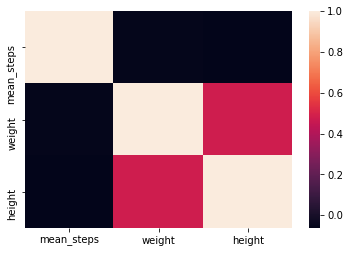

In [9]:
sns.heatmap(df_subset[["mean_steps", "weight", "height"]].corr());

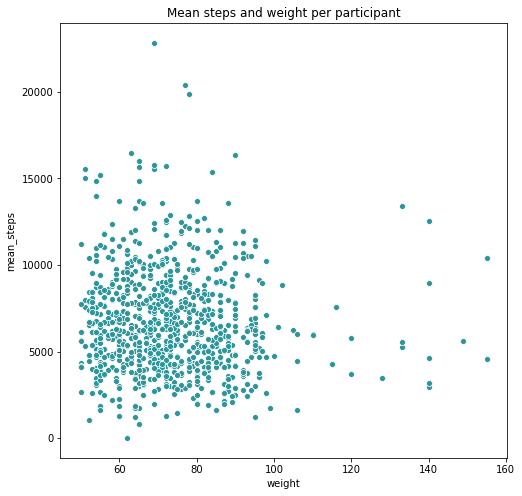

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_subset["weight"], y=df_subset["mean_steps"], color="#2F9599")
plt.title("Mean steps and weight per participant")
plt.show()

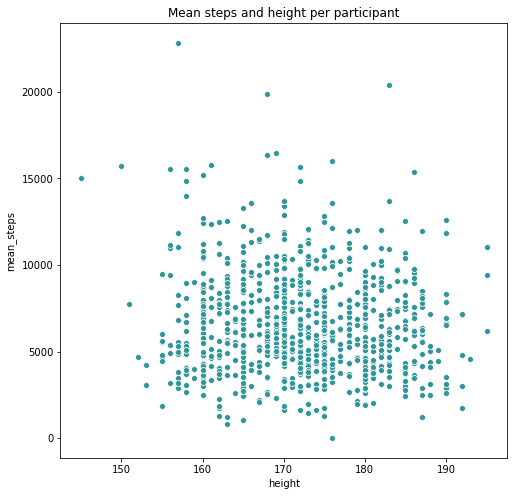

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_subset["height"], y=df_subset["mean_steps"], color="#2F9599")
plt.title("Mean steps and height per participant")
plt.show()

###  Pearson's *r*.

The *r* in regards to the mean steps and weight is -0.054 and *p* is 0.10. 
The *r* in regards to the mean steps and height is -0.064 and *p* is 0.05. 

We can conclude the following:

- Mean steps and weight/height are not correlated, or more nuanced: there is a minimal negative correlation of 0.05/0.06.
- The minimal negative correlation is not significant.

In [12]:
from scipy.stats.stats import pearsonr
print(pearsonr(df_subset["mean_steps"],df_subset["weight"]))
print(pearsonr(df_subset["mean_steps"],df_subset["height"]))

(-0.05437157696867224, 0.10541454263932047)
(-0.06441418619616886, 0.05501107768060783)


### Which group of participants walk the most?

Since there are no female participants who toke any steps in the education category: 'no degree' we leave this category out of scope. Therefore, the most significant difference in mean steps per day between male and female participants can be found in the education category: primary. 
The boxplot shows a reasonable equal amount of steps per gender among the categories: master or doctorate, bachelor and vocational. The violin plot does show a difference in the distribution in the data. We maybe can carefully conclude that there might be a more considerable difference among female participants when it comes to the number of steps taken a day, compared to male participants.

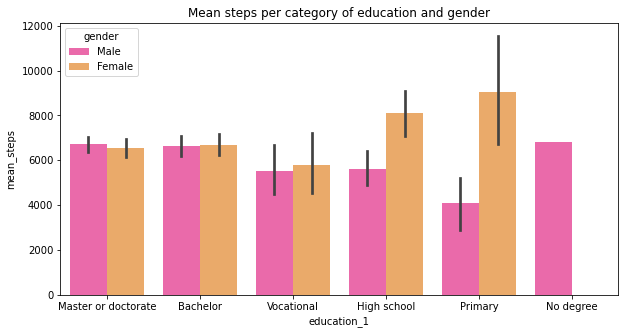

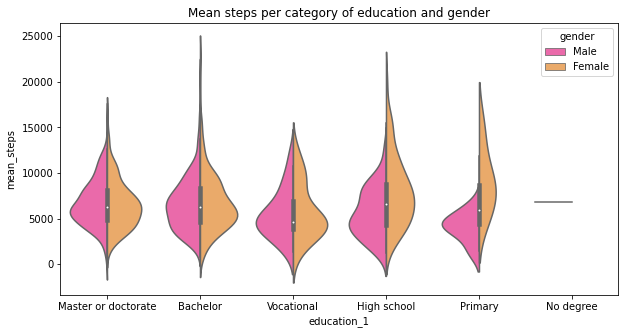

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="education_1", y="mean_steps", hue="gender", data=df_subset, palette="spring")
plt.title("Mean steps per category of education and gender")
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.violinplot(x="education_1", y="mean_steps", hue="gender", data=df_subset, palette="spring", split=True, rug=True)
plt.title("Mean steps per category of education and gender")
plt.show()

### Where do the participants live?

The graph and crosstab below both show that most participants reside in Lille, to be exact 56.9 percent of the male and 50.7 percent of female participants. The other participants, male and female, are relatively evenly distributed over the other cities, Bordeaux, Montpellier and Lyon.



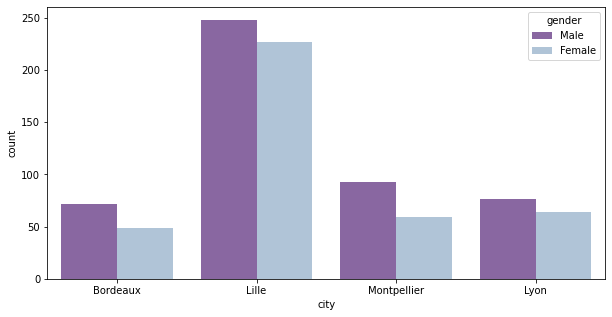

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x="city", hue="gender", data=df_subset, palette="BuPu_r")
plt.show()

In [15]:
pd.crosstab(df_subset["city"], df_subset["gender"], normalize='columns') * 100

gender,Female,Male
city,,
Bordeaux,12.280702,14.723926
Lille,56.892231,50.715746
Lyon,16.040100,15.541922
Montpellier,14.786967,19.018405


### Reference

Hermsen, S., Moons, J., Kerkhof, P., Wiekens, C., & De Groot, M. (2017). *Determinants for sustained use of an activity tracker: observational study. JMIR mHealth and uHealth, 5(10).*